Nama : Wahyu Krisna Aji

Dataset : Bank Loan Status Dataset

Source : Kaggle

Link : https://www.kaggle.com/datasets/zaurbegiev/my-dataset?select=credit_train.csv

In [128]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **COLLECTING DATA**

In [129]:
data = pd.read_csv('credit_train.csv')

# **DATA UNDESTANDING AND FILL THE MISSING VALUE**

In [130]:
data

Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
100509                                   NaN   
100510                                   NaN   
100511                                   NaN   
100512                                   NaN   
100513                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4       81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                      ...         ...                  ...   
100509                                   NaN         NaN                  NaN   
100510                                   NaN         NaN                  NaN   
100511                                   NaN         NaN                  NaN   
100512                                   NaN         NaN                  NaN   
100513                                   NaN         NaN                  NaN   

              Term  Credit Score  Annual Income Years in current job  \
0       Short Term         709.0      1167493.0              8 years   
1       Short Term           NaN            NaN            10+ years   
2       Short Term         741.0      2231892.0              8 years   
3        Long Term         721.0       806949.0              3 years   
4       Short Term           NaN            NaN              5 years   
...            ...           ...            ...                  ...   
100509         NaN           NaN            NaN                  NaN   
100510         NaN           NaN            NaN                  NaN   
100511         NaN           NaN            NaN                  NaN   
100512         NaN           NaN            NaN                  NaN   
100513         NaN           NaN            NaN                  NaN   

       Home Ownership             Purpose  Monthly Debt  \
0       Home Mortgage   Home Improvements       5214.74   
1       Home Mortgage  Debt Consolidation      33295.98   
2            Own Home  Debt Consolidation      29200.53   
3            Own Home  Debt Consolidation       8741.90   
4                Rent  Debt Consolidation      20639.70   
...               ...                 ...           ...   
100509            NaN                 NaN           NaN   
100510            NaN                 NaN           NaN   
100511            NaN                 NaN           NaN   
100512            NaN                 NaN           NaN   
100513            NaN                 NaN           NaN   

        Years of Credit History  Months since last delinquent  \
0                          17.2                           NaN   
1                          21.1                           8.0   
2                          14.9                          29.0   
3                          12.0                           NaN   
4                           6.1                           NaN   
...                         ...                           ...   
100509                      NaN                           NaN   
100510                      NaN                           NaN   
100511                      NaN                           NaN   
100512                      NaN                           NaN   
100513                      NaN                           NaN   

        Number of Open Accounts  Number of Credit Problems  \
0                           6.0                        1.0   
1       

In [131]:
data.shape

(100514, 19)

In [132]:
data = data.drop(['Loan ID', 'Customer ID', 'Years in current job'], axis=1)
data.head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Home Ownership             Purpose  Monthly Debt  Years of Credit History  \
0  Home Mortgage   Home Improvements       5214.74                     17.2   
1  Home Mortgage  Debt Consolidation      33295.98                     21.1   
2       Own Home  Debt Consolidation      29200.53                     14.9   
3       Own Home  Debt Consolidation       8741.90                     12.0   
4           Rent  Debt Consolidation      20639.70                      6.1   

   Months since last delinquent  Number of Open Accounts  \
0                           NaN                      6.0   
1                           8.0                     35.0   
2                          29.0                     18.0   
3                           NaN                      9.0   
4                           NaN                     15.0   

   Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
4                        0.0                253460.0             427174.0   

   Bankruptcies  Tax Liens  
0           1.0        0.0  
1           0.0        0.0  
2           0.0        0.0  
3           0.0        0.0  
4           0.0        0.0

In [133]:
data.isna()

Loan Status  Current Loan Amount   Term  Credit Score  Annual Income  \
0             False                False  False         False          False   
1             False                False  False          True           True   
2             False                False  False         False          False   
3             False                False  False         False          False   
4             False                False  False          True           True   
...             ...                  ...    ...           ...            ...   
100509         True                 True   True          True           True   
100510         True                 True   True          True           True   
100511         True                 True   True          True           True   
100512         True                 True   True          True           True   
100513         True                 True   True          True           True   

        Home Ownership  Purpose  Monthly Debt  Years of Credit History  \
0                False    False         False                    False   
1                False    False         False                    False   
2                False    False         False                    False   
3                False    False         False                    False   
4                False    False         False                    False   
...                ...      ...           ...                      ...   
100509            True     True          True                     True   
100510            True     True          True                     True   
100511            True     True          True                     True   
100512            True     True          True                     True   
100513            True     True          True                     True   

        Months since last delinquent  Number of Open Accounts  \
0                               True                    False   
1                              False                    False   
2                              False                    False   
3                               True                    False   
4                               True                    False   
...                              ...                      ...   
100509                          True                     True   
100510                          True                     True   
100511                          True                     True   
100512                          True                     True   
100513                          True                     True   

        Number of Credit Problems  Current Credit Balance  \
0                           False                   False   
1                           False                   False   
2                           False                   False   
3                           False                   False   
4                           False                   False   
...                           ...                     ...   
100509                       True                    True   
100510                       True                    True   
100511                       True                    True   
100512                       True                    True   
100513                       True                    True   

        Maximum Open Credit  Bankruptcies  Tax Liens  
0                     False         False      False  
1                     False         False      False  
2                     False         False      False  
3                     False         False      False  
4                     False         False      False  
...                     ...           ...        ...  
100509                 True          True       True  
100510                 True          True       True  
100511                 True          True       True  
100512                 True          True       True  
100513                 True          Tr

In [134]:
data = data.fillna(method ='bfill')
data

Loan Status  Current Loan Amount        Term  Credit Score  \
0       Fully Paid             445412.0  Short Term         709.0   
1       Fully Paid             262328.0  Short Term         741.0   
2       Fully Paid           99999999.0  Short Term         741.0   
3       Fully Paid             347666.0   Long Term         721.0   
4       Fully Paid             176220.0  Short Term        7290.0   
...            ...                  ...         ...           ...   
100509         NaN                  NaN         NaN           NaN   
100510         NaN                  NaN         NaN           NaN   
100511         NaN                  NaN         NaN           NaN   
100512         NaN                  NaN         NaN           NaN   
100513         NaN                  NaN         NaN           NaN   

        Annual Income Home Ownership             Purpose  Monthly Debt  \
0           1167493.0  Home Mortgage   Home Improvements       5214.74   
1           2231892.0  Home Mortgage  Debt Consolidation      33295.98   
2           2231892.0       Own Home  Debt Consolidation      29200.53   
3            806949.0       Own Home  Debt Consolidation       8741.90   
4            896857.0           Rent  Debt Consolidation      20639.70   
...               ...            ...                 ...           ...   
100509            NaN            NaN                 NaN           NaN   
100510            NaN            NaN                 NaN           NaN   
100511            NaN            NaN                 NaN           NaN   
100512            NaN            NaN                 NaN           NaN   
100513            NaN            NaN                 NaN           NaN   

        Years of Credit History  Months since last delinquent  \
0                          17.2                           8.0   
1                          21.1                           8.0   
2                          14.9                          29.0   
3                          12.0                          10.0   
4                           6.1                          10.0   
...                         ...                           ...   
100509                      NaN                           NaN   
100510                      NaN                           NaN   
100511                      NaN                           NaN   
100512                      NaN                           NaN   
100513                      NaN                           NaN   

        Number of Open Accounts  Number of Credit Problems  \
0                           6.0                        1.0   
1                          35.0                        0.0   
2                          18.0                        1.0   
3                           9.0                        0.0   
4                          15.0                        0.0   
...                         ...                        ...   
100509                      NaN                        NaN   
100510                      NaN                        NaN   
100511                      NaN                        NaN   
100512                      NaN                        NaN   
100513                      NaN                        NaN   

        Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
0                     228190.0             416746.0           1.0        0.0  
1                     229976.0             850784.0           0.0        0.0  
2                     297996.0             750090.0           0.0        0.0  
3                     256329.0             386958.0           0.0        0.0  
4                     253460.0             427174.0           0.0        0.0  
...                        ...                  ...           ...        ...  
100509                     NaN                  NaN           NaN        NaN  
100510                     NaN                  NaN           NaN        NaN  
100511                     NaN                  NaN 

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  object 
 1   Current Loan Amount           100000 non-null  float64
 2   Term                          100000 non-null  object 
 3   Credit Score                  100000 non-null  float64
 4   Annual Income                 100000 non-null  float64
 5   Home Ownership                100000 non-null  object 
 6   Purpose                       100000 non-null  object 
 7   Monthly Debt                  100000 non-null  float64
 8   Years of Credit History       100000 non-null  float64
 9   Months since last delinquent  99998 non-null   float64
 10  Number of Open Accounts       100000 non-null  float64
 11  Number of Credit Problems     100000 non-null  float64
 12  Current Credit Balance        100000 non-nul

In [136]:
data = data.drop('Months since last delinquent', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Home Ownership             100000 non-null  object 
 6   Purpose                    100000 non-null  object 
 7   Monthly Debt               100000 non-null  float64
 8   Years of Credit History    100000 non-null  float64
 9   Number of Open Accounts    100000 non-null  float64
 10  Number of Credit Problems  100000 non-null  float64
 11  Current Credit Balance     100000 non-null  float64
 12  Maximum Open Credit        100000 non-null  float64
 13  Bankruptcies               10

In [137]:
data = data.dropna()
data.shape

(100000, 15)

In [138]:
data.groupby('Purpose')['Purpose'].agg('count')

Purpose
Business Loan            1569
Buy House                 678
Buy a Car                1265
Debt Consolidation      78552
Educational Expenses       99
Home Improvements        5839
Medical Bills            1127
Other                    3250
Take a Trip               573
major_purchase            352
moving                    150
other                    6037
renewable_energy           10
small_business            283
vacation                  101
wedding                   115
Name: Purpose, dtype: int64

In [139]:
data.groupby('Home Ownership')['Home Ownership'].agg('count')

Home Ownership
HaveMortgage       214
Home Mortgage    48410
Own Home          9182
Rent             42194
Name: Home Ownership, dtype: int64

In [140]:
data.groupby('Term')['Term'].agg('count')

Term
Long Term     27792
Short Term    72208
Name: Term, dtype: int64

In [141]:
data.groupby('Loan Status')['Loan Status'].agg('count')

Loan Status
Charged Off    22639
Fully Paid     77361
Name: Loan Status, dtype: int64

In [142]:
data = data.drop('Purpose', axis=1)

# **EXPLORATORY DATA ANALYSIS - DESCRIPTON**



In [143]:
data.describe()

Current Loan Amount   Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+05  100000.000000   1.000000e+05  100000.000000   
mean          1.176045e+07    1075.584910   1.380392e+06   18472.412336   
std           3.178394e+07    1474.105703   1.064319e+06   12174.992609   
min           1.080200e+04     585.000000   7.662700e+04       0.000000   
25%           1.796520e+05     705.000000   8.482835e+05   10214.162500   
50%           3.122460e+05     724.000000   1.173896e+06   16220.300000   
75%           5.249420e+05     741.000000   1.653475e+06   24012.057500   
max           1.000000e+08    7510.000000   1.655574e+08  435843.280000   

       Years of Credit History  Number of Open Accounts  \
count            100000.000000             100000.00000   
mean                 18.199141                 11.12853   
std                   7.015324                  5.00987   
min                   3.600000                  0.00000   
25%                  13.500000                  8.00000   
50%                  16.900000                 10.00000   
75%                  21.700000                 14.00000   
max                  70.500000                 76.00000   

       Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
count              100000.000000            1.000000e+05         1.000000e+05   
mean                    0.168310            2.946374e+05         7.607906e+05   
std                     0.482705            3.761709e+05         8.384420e+06   
min                     0.000000            0.000000e+00         0.000000e+00   
25%                     0.000000            1.126700e+05         2.734380e+05   
50%                     0.000000            2.098170e+05         4.678740e+05   
75%                     0.000000            3.679588e+05         7.829580e+05   
max                    15.000000            3.287897e+07         1.539738e+09   

        Bankruptcies     Tax Liens  
count  100000.000000  100000.00000  
mean        0.117750       0.02931  
std         0.351378       0.25817  
min         0.000000       0.00000  
25%         0.000000       0.00000  
50%         0.000000       0.00000  
75%         0.000000       0.00000  
max         7.000000      15.00000

# **DEAL WITH OUTLIERS**

**Monthly Debt**


<Axes: xlabel='Monthly Debt'>

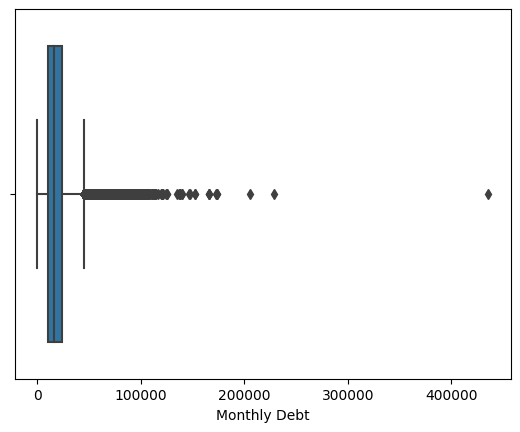

In [144]:
sns.boxplot(x=data['Monthly Debt'])

**Number of Open Accounts**

<Axes: xlabel='Number of Open Accounts'>

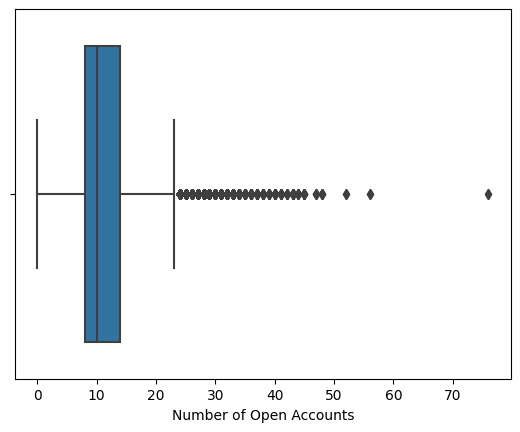

In [145]:
sns.boxplot(x=data['Number of Open Accounts'])

**Annual Income**

<Axes: xlabel='Annual Income'>

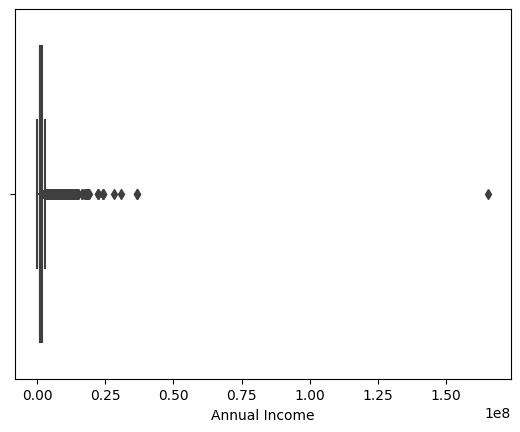

In [146]:
sns.boxplot(x=data['Annual Income'])

**Years of Credit History**

<Axes: xlabel='Years of Credit History'>

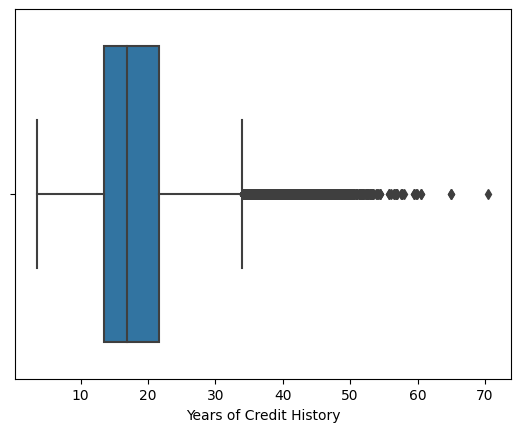

In [147]:
sns.boxplot(x=data['Years of Credit History'])

In [148]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
 
# Check data size without an outliers
data.shape

<ipython-input-148-0d7177362ac7>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-148-0d7177362ac7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-148-0d7177362ac7>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]


(57142, 14)

# **UNIVARIATE ANALYSIS**

## CATEGORICAL DATA

**Loan Status**



             Sample Count  Percentage
Fully Paid          44877        78.5
Charged Off         12265        21.5


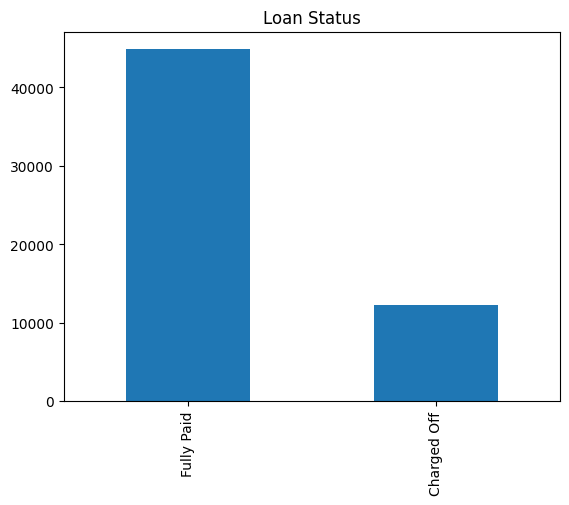

In [149]:
category = ['Loan Status', 'Term', 'Home Ownership']
fitur = category[0]
count = data[fitur].value_counts()
percent = 100*data[fitur].value_counts(normalize=True)
new_data = pd.DataFrame({'Sample Count':count, 'Percentage':percent.round(1)})
print(new_data)
count.plot(kind='bar', title=fitur);

**Term**

            Sample Count  Percentage
Short Term         42248        73.9
Long Term          14894        26.1


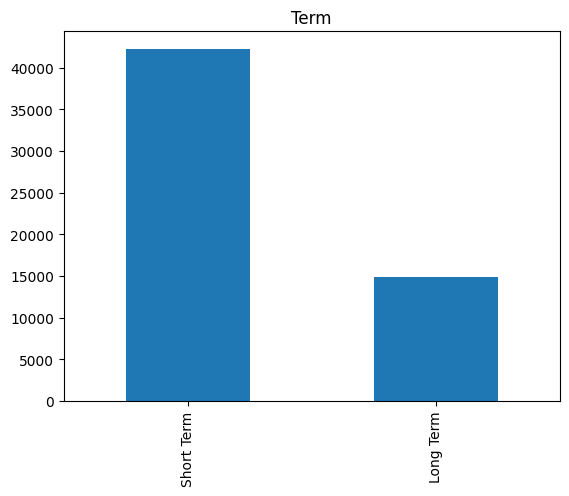

In [150]:
fitur = category[1]
count = data[fitur].value_counts()
percent = 100*data[fitur].value_counts(normalize=True)
new_data = pd.DataFrame({'Sample Count':count, 'Percentage':percent.round(1)})
print(new_data)
count.plot(kind='bar', title=fitur);

**Home Ownership**

               Sample Count  Percentage
Rent                  26245        45.9
Home Mortgage         25704        45.0
Own Home               5078         8.9
HaveMortgage            115         0.2


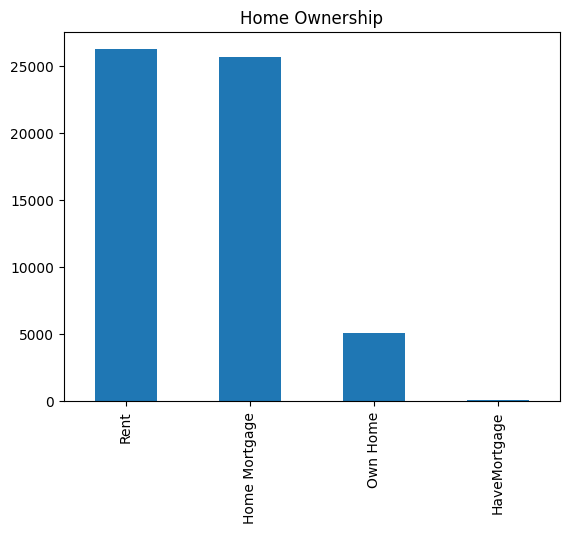

In [151]:
fitur = category[2]
count = data[fitur].value_counts()
percent = 100*data[fitur].value_counts(normalize=True)
new_data = pd.DataFrame({'Sample Count':count, 'Percentage':percent.round(1)})
print(new_data)
count.plot(kind='bar', title=fitur);

# Numerical

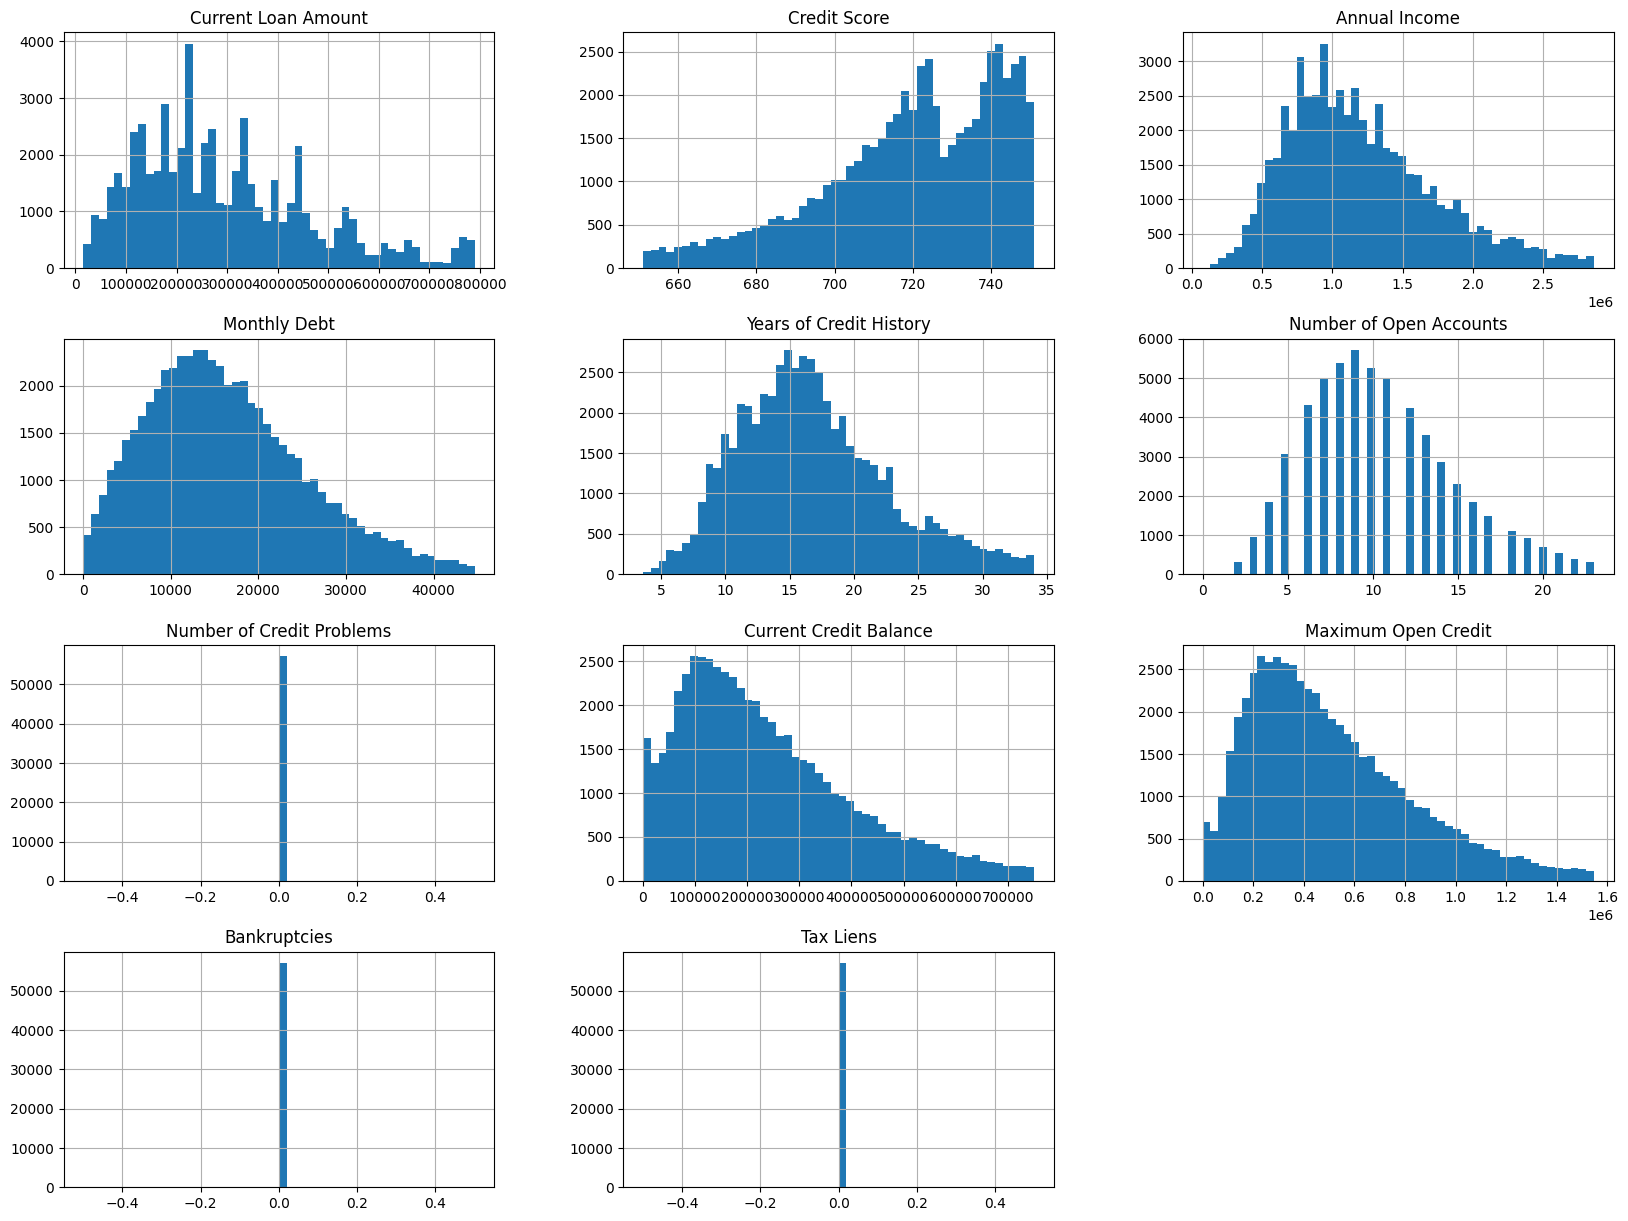

In [152]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# **MULTIVARIATE ANALYSIS**

# CATEGORICAL

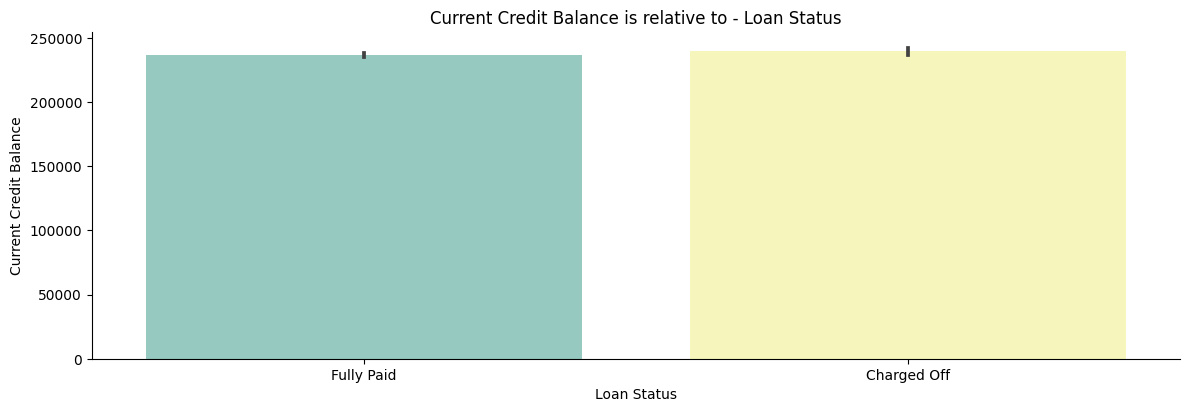

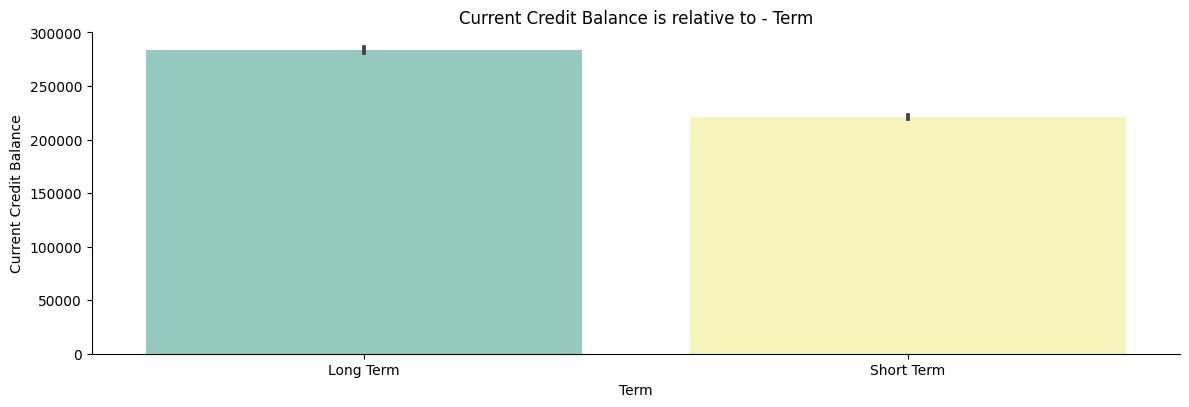

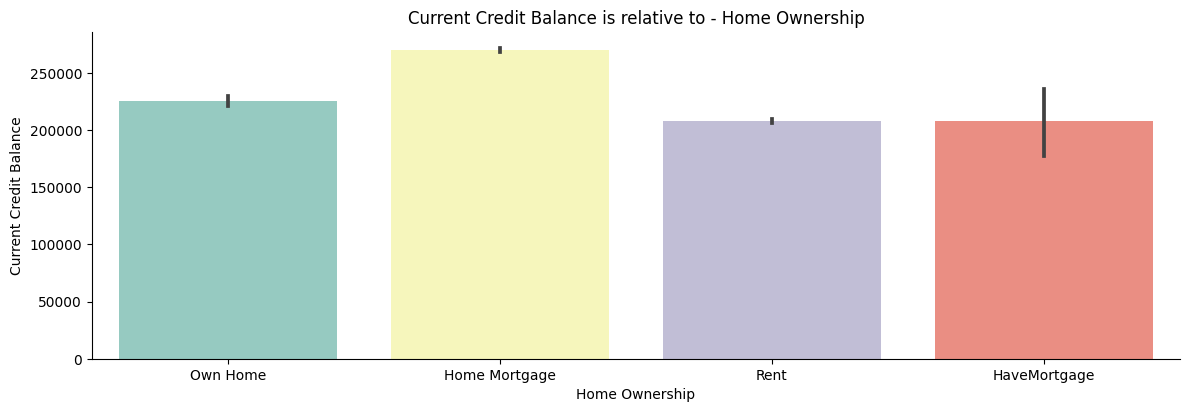

In [153]:
category_feature = data.select_dtypes(include='object').columns.to_list()
 
for col in category_feature:
  sns.catplot(x=col, y="Current Credit Balance", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Current Credit Balance is relative to - {}".format(col))

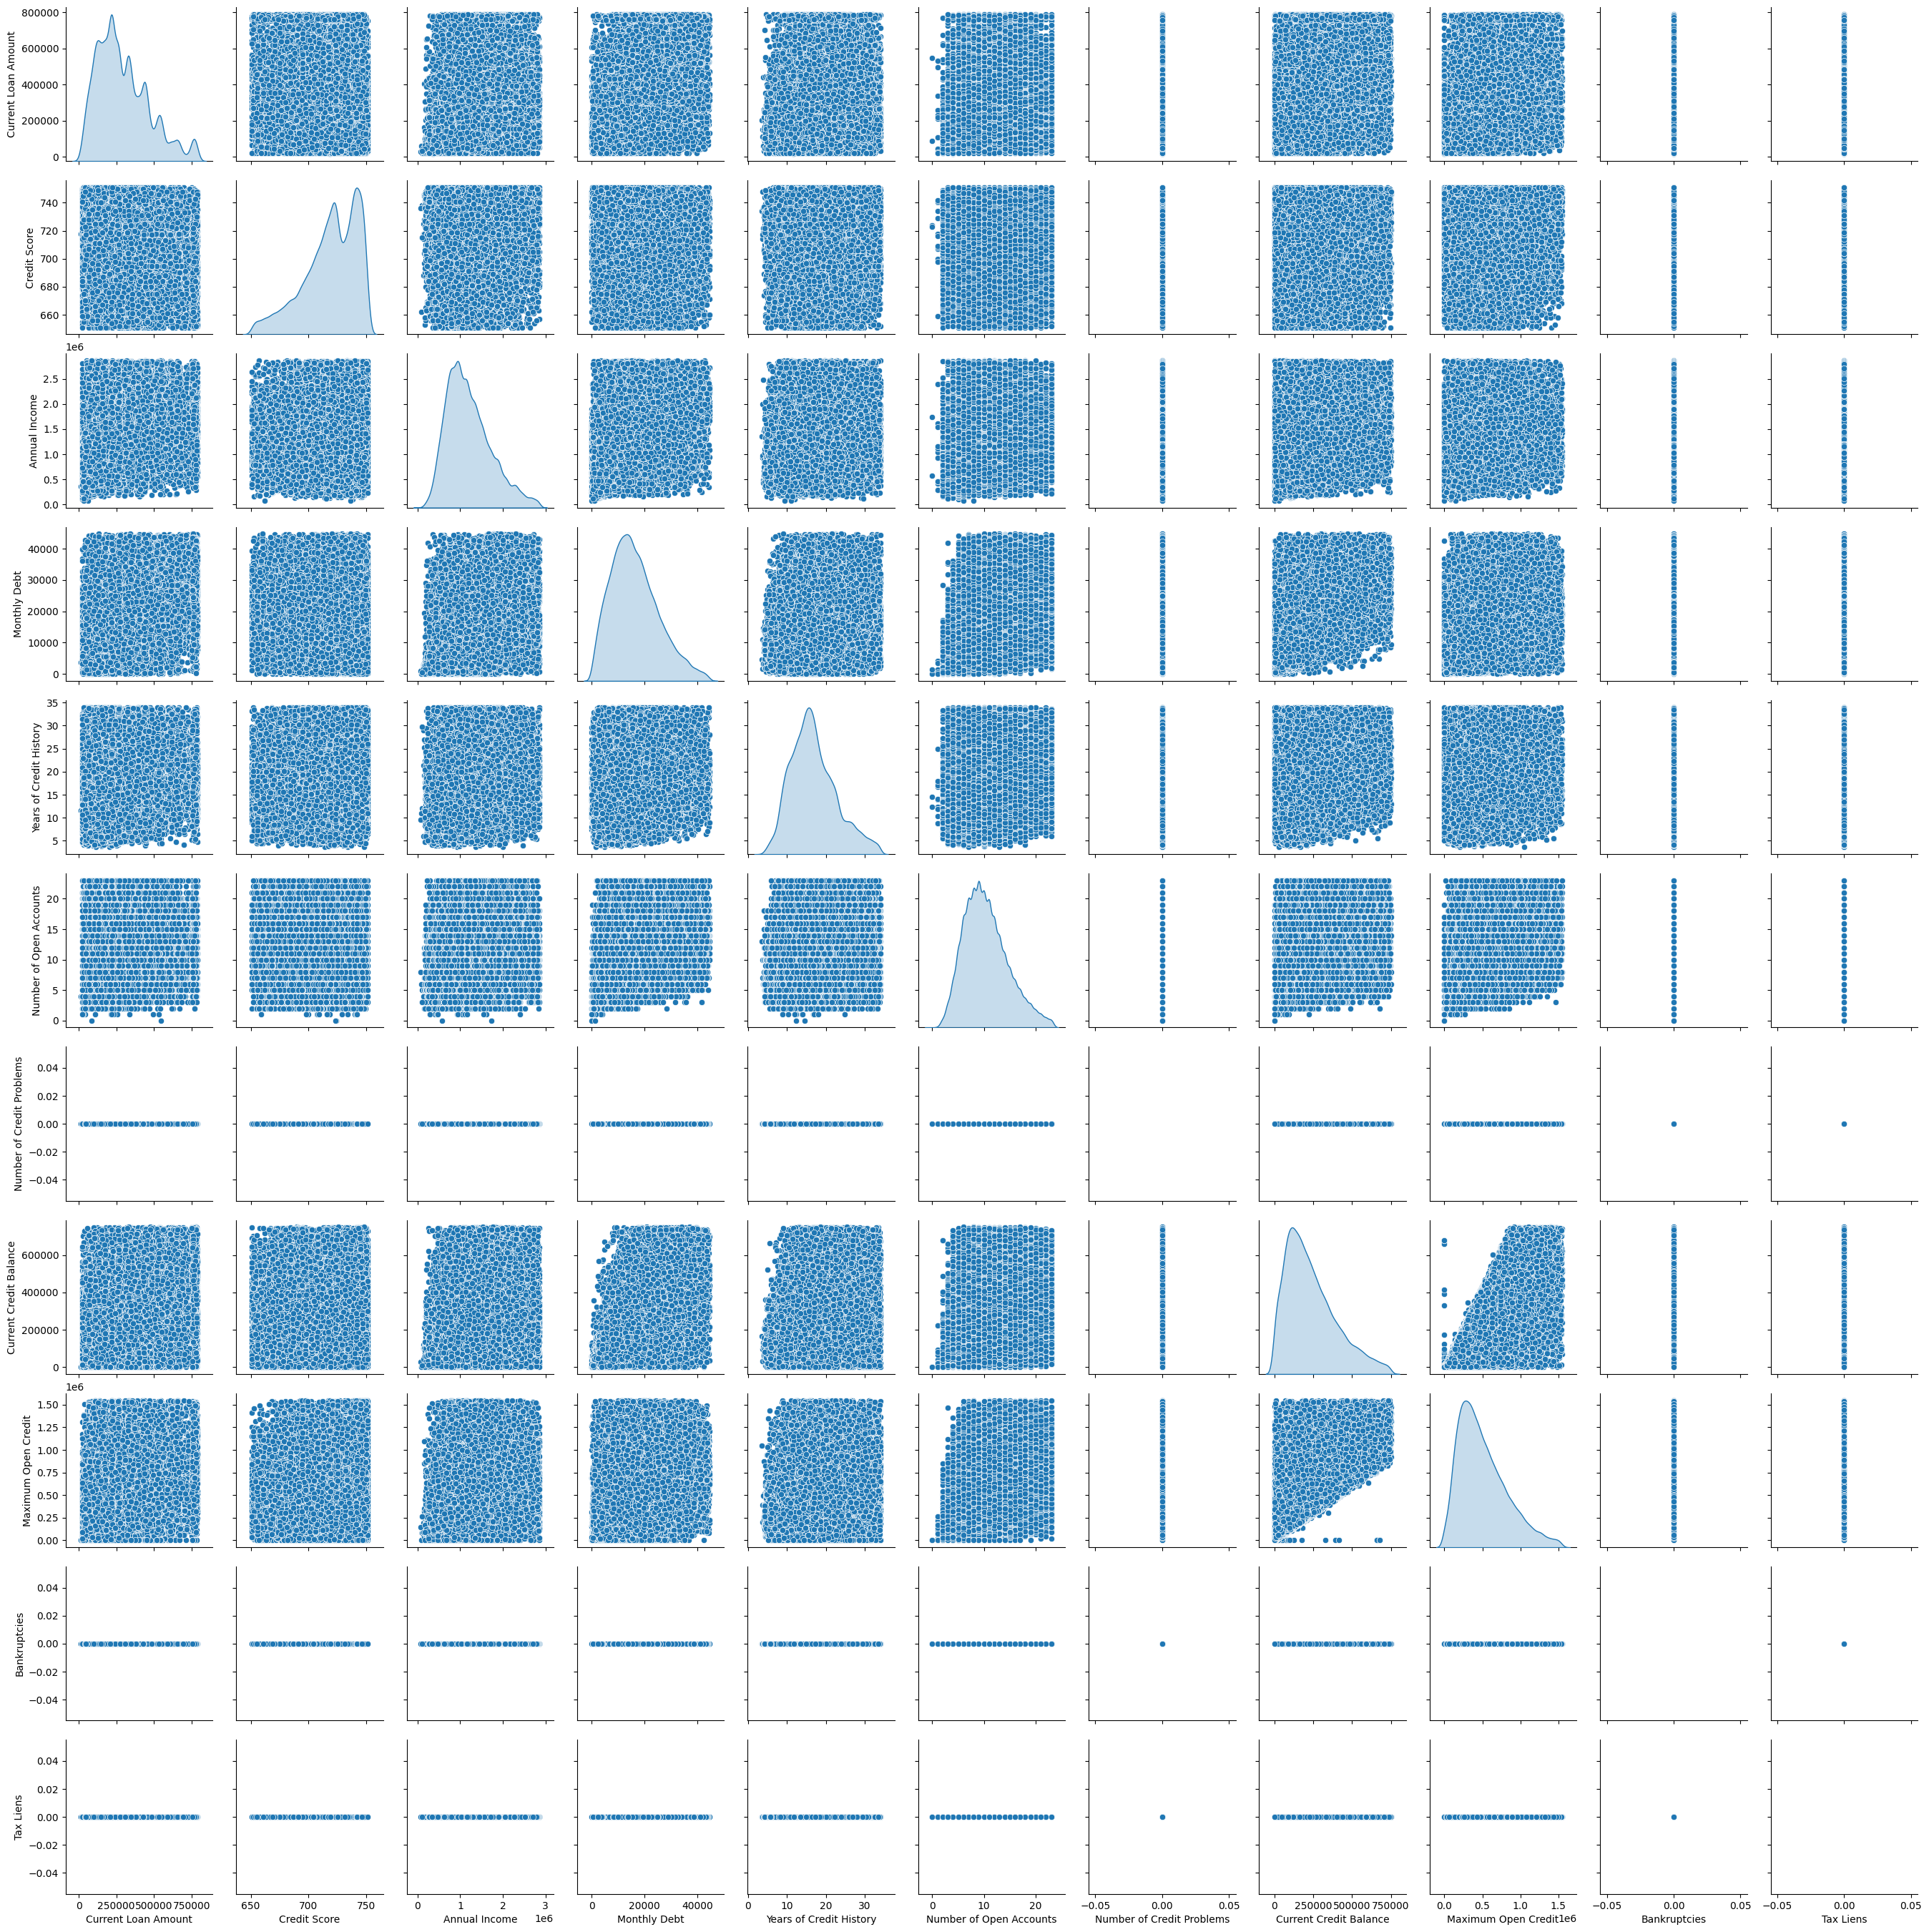

In [154]:
sns.pairplot(data, diag_kind = 'kde')

<ipython-input-155-3bbb2b4ee627>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().round(2)


Text(0.5, 1.0, 'Matrix Correlation for Numeric Feature ')

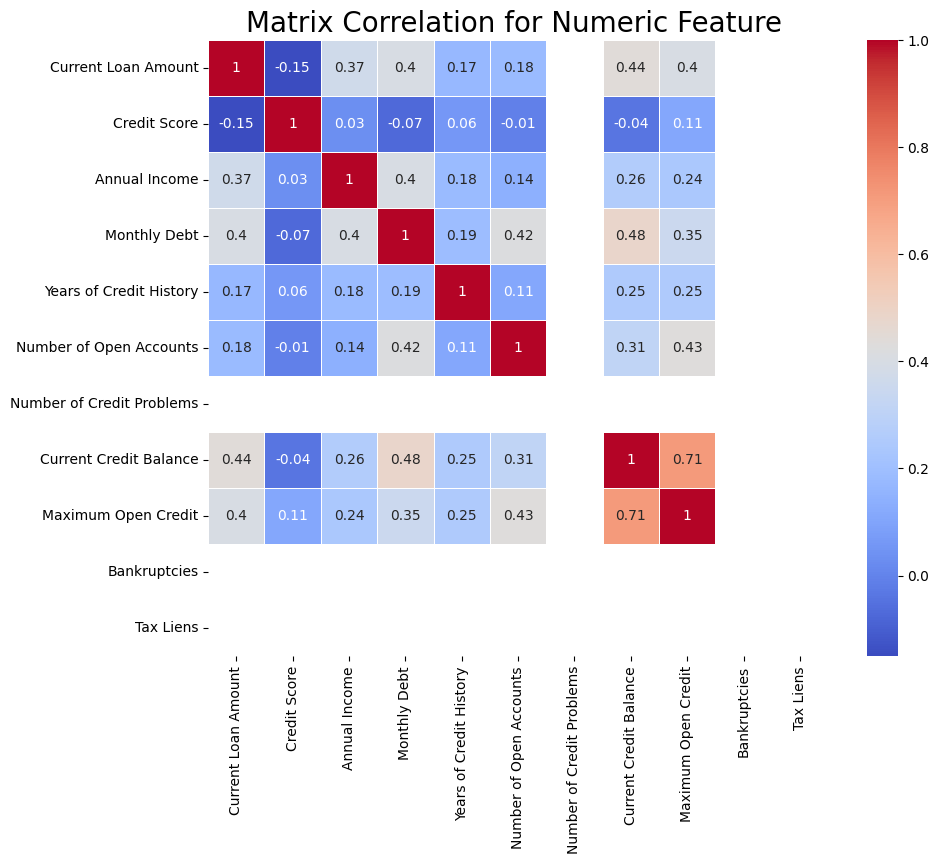

In [155]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Matrix Correlation for Numeric Feature ", size=20)

# **DATA PREPARATION**

In [156]:
from sklearn.preprocessing import  OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['Loan Status'], prefix='Loan Status')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Term'], prefix='Term')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Home Ownership'], prefix='Home Ownership')],axis=1)
data.drop(['Loan Status', 'Term', 'Home Ownership'], axis=1, inplace=True)
data.head()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
3              347666.0         721.0       806949.0       8741.90   
7              648714.0         678.0      2559110.0      14806.13   
8              548746.0         678.0      2559110.0      18660.28   
9              215952.0         739.0      1454735.0      39277.75   
15             449020.0         723.0      1821967.0      18904.81   

    Years of Credit History  Number of Open Accounts  \
3                      12.0                      9.0   
7                       8.2                     15.0   
8                      22.6                      4.0   
9                      13.9                     20.0   
15                     19.4                      8.0   

    Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
3                         0.0                256329.0             386958.0   
7                         0.0                193306.0             864204.0   
8                         0.0                437171.0             555038.0   
9                         0.0                669560.0            1021460.0   
15                        0.0                334533.0             428956.0   

    Bankruptcies  Tax Liens  Loan Status_Charged Off  Loan Status_Fully Paid  \
3            0.0        0.0                        0                       1   
7            0.0        0.0                        1                       0   
8            0.0        0.0                        0                       1   
9            0.0        0.0                        0                       1   
15           0.0        0.0                        0                       1   

    Term_Long Term  Term_Short Term  Home Ownership_HaveMortgage  \
3                1                0                            0   
7                1                0                            0   
8                0                1                            0   
9                0                1                            0   
15               1                0                            0   

    Home Ownership_Home Mortgage  Home Ownership_Own Home  Home Ownership_Rent  
3                              0                        1                    0  
7                              1                        0                    0  
8                              0                        0                    1  
9                              0                        0                    1  
15                             0                        1                    0

# **Train-Test-Split**

In [157]:
from sklearn.model_selection import train_test_split
 
X = data.drop(["Current Credit Balance"],axis =1)
Y = data["Current Credit Balance"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [158]:
print(f'Total Sample Data in Dataset: {len(X)}')
print(f'Total Sample Data in Train Dataset: {len(X_train)}')
print(f'Total Sample Data in Test Dataset: {len(X_test)}')

Total Sample Data in Dataset: 57142
Total Sample Data in Train Dataset: 45713
Total Sample Data in Test Dataset: 11429


# **STANDARIZATION**

In [159]:
from sklearn.preprocessing import StandardScaler

num_feat = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
            'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems',
            'Bankruptcies', 'Tax Liens', 'Maximum Open Credit']
std_scaler = StandardScaler()
std_scaler.fit(X_train[num_feat])
X_train[num_feat] = std_scaler.transform(X_train.loc[:, num_feat])
X_train[num_feat].head()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
3703             -0.941649     -0.115650      -0.857642     -0.646382   
21815            -1.199220      0.100882      -0.221272      1.000175   
8376              0.325018     -0.418794      -0.178230      0.320841   
11084            -0.393766      0.360719      -0.144111      1.728790   
68931             0.803052     -0.721938       0.010467      1.045514   

       Years of Credit History  Number of Open Accounts  \
3703                  0.766547                -0.092313   
21815                -0.054999                 2.728021   
8376                  0.030579                 0.377742   
11084                -0.243270                 0.612770   
68931                -0.106346                 0.377742   

       Number of Credit Problems  Bankruptcies  Tax Liens  Maximum Open Credit  
3703                         0.0           0.0        0.0            -0.832192  
21815                        0.0           0.0        0.0             1.439697  
8376                         0.0           0.0        0.0             0.195231  
11084                        0.0           0.0        0.0            -0.851455  
68931                        0.0           0.0        0.0            -0.021742

In [160]:
X_train[num_feat].describe().round(4)

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count           45713.0000    45713.0000     45713.0000    45713.0000   
mean               -0.0000        0.0000         0.0000       -0.0000   
std                 1.0000        1.0000         1.0000        1.0000   
min                -1.6154       -2.9306        -2.1461       -1.8095   
25%                -0.7686       -0.5920        -0.7539       -0.7451   
50%                -0.1831        0.1442        -0.1541       -0.1305   
75%                 0.6134        0.8371         0.5911        0.6134   
max                 2.9010        1.4001         3.1775        3.1473   

       Years of Credit History  Number of Open Accounts  \
count               45713.0000               45713.0000   
mean                   -0.0000                  -0.0000   
std                     1.0000                   1.0000   
min                    -2.2629                  -2.4426   
25%                    -0.7225                  -0.7974   
50%                    -0.1406                  -0.0923   
75%                     0.6125                   0.6128   
max                     2.9402                   2.9630   

       Number of Credit Problems  Bankruptcies  Tax Liens  Maximum Open Credit  
count                    45713.0       45713.0    45713.0           45713.0000  
mean                         0.0           0.0        0.0              -0.0000  
std                          0.0           0.0        0.0               1.0000  
min                          0.0           0.0        0.0              -1.5971  
25%                          0.0           0.0        0.0              -0.7680  
50%                          0.0           0.0        0.0              -0.2071  
75%                          0.0           0.0        0.0               0.5900  
max                          0.0           0.0        0.0               3.2927

# **MODEL DEVELOPMENT**

In [161]:
model_df = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'ADABoosting'])

**KNN**

In [164]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, Y_train)
 
model_df.loc['train_mse','knn'] = mean_squared_error(y_pred = knn_model.predict(X_train), y_true=Y_train)


**RANDOM FOREST**

In [165]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
random_forest.fit(X_train, Y_train)
 
model_df.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=random_forest.predict(X_train), y_true=Y_train)  

**ADA BOOSTING**

In [166]:
from sklearn.ensemble import AdaBoostRegressor

ADABoosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
ADABoosting.fit(X_train, Y_train)
model_df.loc['train_mse','ADABoosting'] = mean_squared_error(y_pred=ADABoosting.predict(X_train), y_true=Y_train)

# **MODEL EVALUATION**

In [167]:
X_test.loc[:, num_feat] = std_scaler.transform(X_test[num_feat])

In [168]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dictionaries = {'KNN': knn_model, 'RF': random_forest, 'Boosting': ADABoosting}

for name, model in model_dictionaries.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=Y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=Y_test, y_pred=model.predict(X_test))/1e3
 
mse

train             test
KNN        8257136.428597  10230242.065065
RF         2572564.012774   7656476.840237
Boosting  10149374.854423  10263560.073952

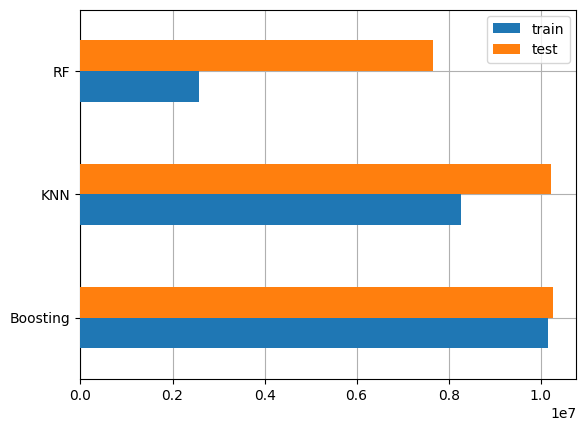

In [169]:
figure, axis = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=axis, zorder=3)
axis.grid(zorder=0)

In [170]:
prediction = X_test.iloc[:1].copy()
prediction_dictionaries = {'y_true':Y_test[:1]}
for name, model in model_dictionaries.items():
    prediction_dictionaries['prediction_'+name] = model.predict(prediction).round(1)
 
pd.DataFrame(prediction_dictionaries)

y_true  prediction_KNN  prediction_RF  prediction_Boosting
13766  149150.0        148405.2       128170.4             118354.3